<a href="https://colab.research.google.com/github/Niranjdatascientist/Machine-learning-projects/blob/main/Bank_Customers_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Customers Churn Prediction**

## **Aim - Predict the Customer Churn for a Bank**

## **About** **Dataset**

This data set contains details of a bank's customers whether the
customer left the bank (closed his account) or he continues to be a customer.

The target variable is 'Exited' which indicates whether a customer has churned(1) or not(0)

This dataset contains the data of a bank with following columns:

1. RowNumber : Corresponds to the row number.
2. CustomerId : An identifier for each customer.
3. Surname : Surname of the customer.
4. CreditScore : Credit Score of the customer.
5. Geography : The geographic location of the customer.
6. Gender : The gender of the customer.
7. Age : The age of the customer.
8. Tenure : Time period the customer has been a client of the bank.
9. Balance : The account balance of the customer.
10.NumOfProducts : Number of products that a customer has purchased through the
   bank like loans, credit card, debit card.
11.HasCrCard : Whether the customer has a credit card or not.
12.IsActiveMember : Whether the customer is an active member.
13.EstimatedSalary : Salary of the customer.
14.Exited : Used as the target. 1 if the customer has left the bank or 0 if customer has not left.


# **Reading Dataset**

In [273]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/Churn_Modelling.csv')
df


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# **Exploratary Data Analysis**

In [274]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [275]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [276]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [277]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [278]:
df.shape

(10000, 14)

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [280]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# **Visualisation**

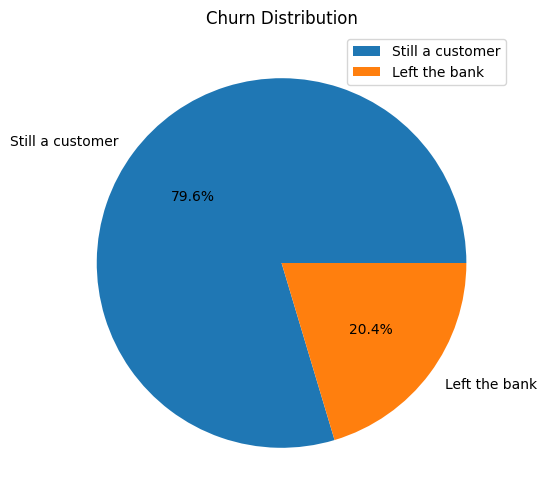

In [281]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=df['Exited'].value_counts()
xlabel=['Still a customer','Left the bank']
plt.pie(x,labels=xlabel,autopct='%1.1f%%')
plt.title('Churn Distribution')
plt.legend(loc='upper right')
plt.show()

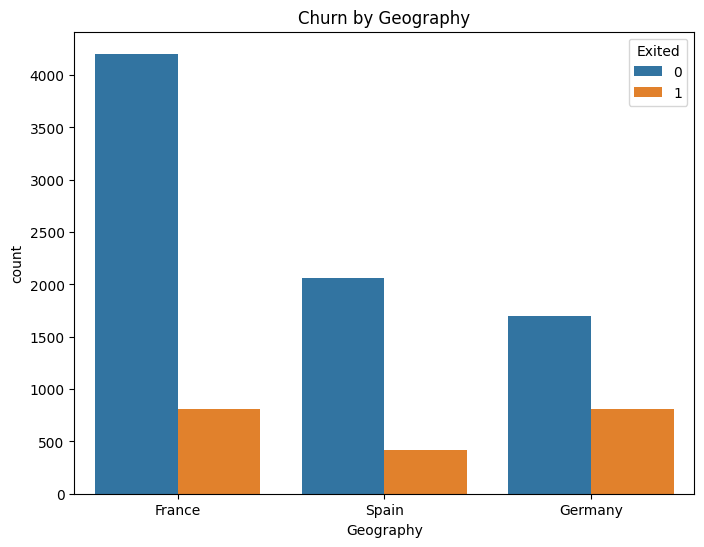

In [282]:
# churn by geography
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Churn by Geography')
plt.show()

Text(0.5, 1.0, 'Churn by Age')

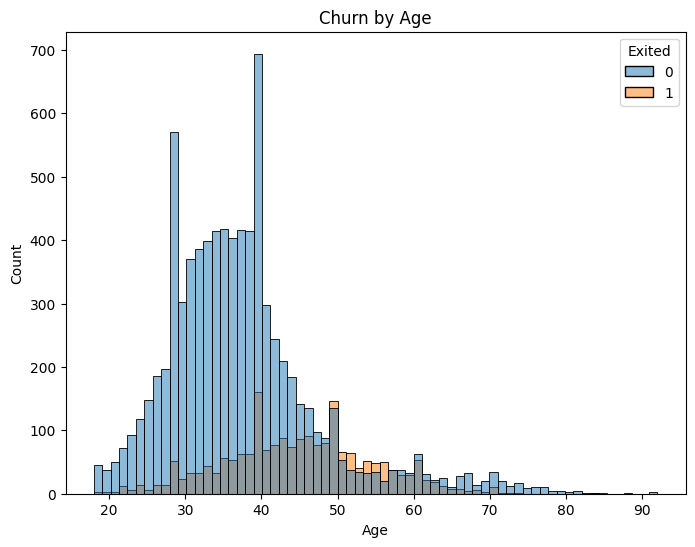

In [283]:
# churn by age
plt.figure(figsize=(8, 6))
sns.histplot(x='Age', hue='Exited', data=df)
plt.title('Churn by Age')


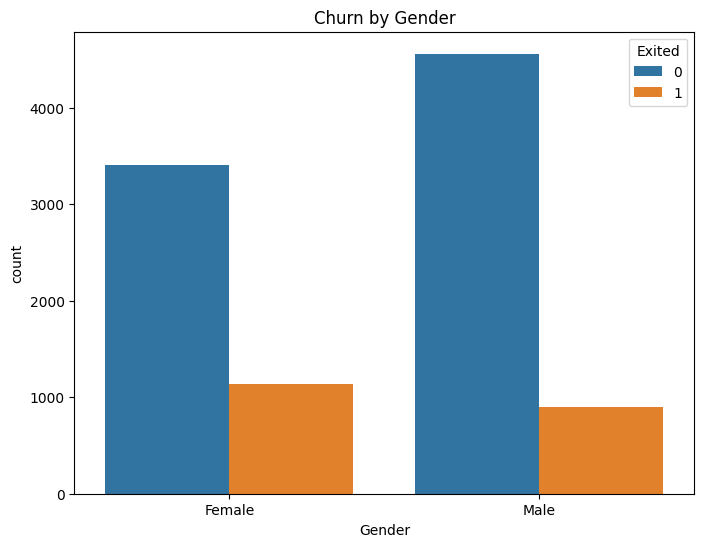

In [284]:
# churn by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Churn by Gender')
plt.show()

Text(0.5, 1.0, 'Churn by Number of Products')

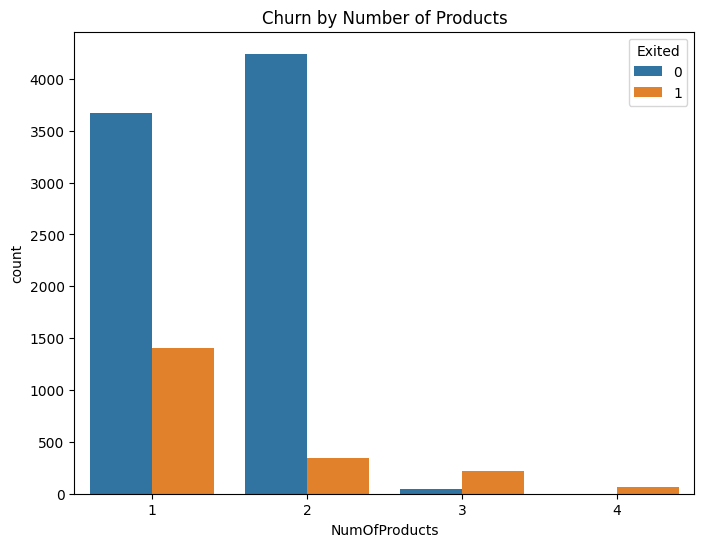

In [285]:
# churn by no.of products
plt.figure(figsize=(8, 6))
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title('Churn by Number of Products')

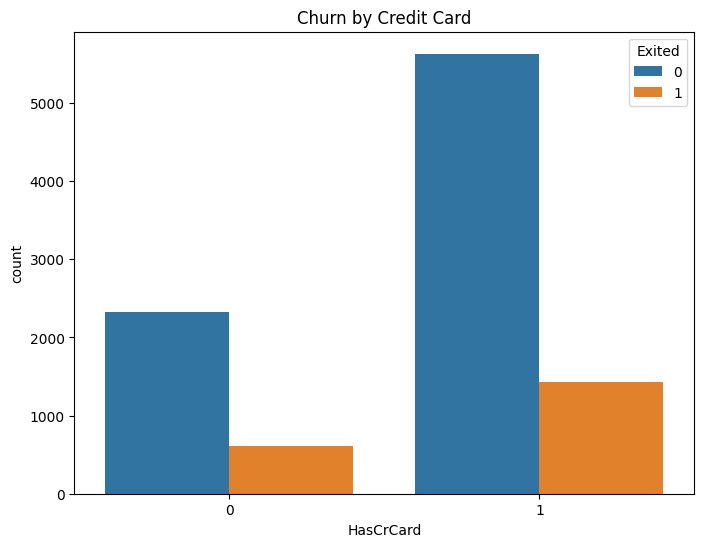

In [286]:
# churn by credit card
plt.figure(figsize=(8, 6))
sns.countplot(x='HasCrCard', hue='Exited', data=df)
plt.title('Churn by Credit Card')
plt.show()

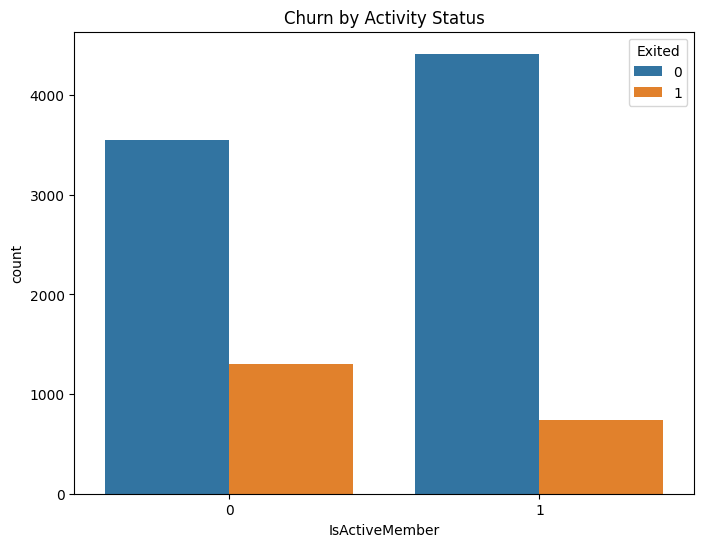

In [287]:
# churn by activity status
plt.figure(figsize=(8, 6))
sns.countplot(x='IsActiveMember', hue='Exited', data=df)
plt.title('Churn by Activity Status')
plt.show()

In [288]:
df.corr()

<ipython-input-288-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<ipython-input-289-52982e6d0257>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linewidths=0.5)


<Axes: >

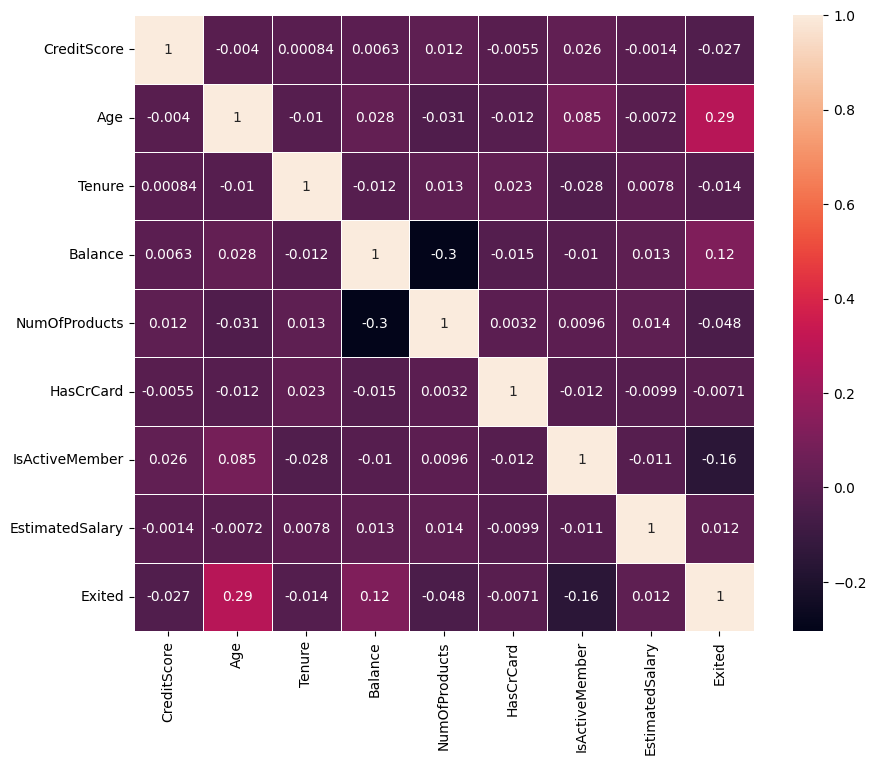

In [289]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,linewidths=0.5)

# **Label Encoding**

In [290]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['Geography']=label.fit_transform(df['Geography'])
df['Gender']=label.fit_transform(df['Gender'])
df['Geography']

0       0
1       2
2       0
3       0
4       2
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: Geography, Length: 10000, dtype: int64

In [291]:
df['Gender']

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int64

In [292]:
df.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# **Splitting x and y**

In [293]:
x=df.iloc[:,:-1].values
x

array([[6.1900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [6.0800000e+02, 2.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [5.0200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [7.0900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [7.7200000e+02, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [7.9200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [294]:
y=df.iloc[:,-1].values
y

array([1, 0, 1, ..., 1, 1, 0])

# **Splitting data to train data and test data**

In [295]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[6.1900000e+02, 2.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.7279243e+05],
       [6.4300000e+02, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.8853311e+05],
       [5.6100000e+02, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.7368039e+05],
       ...,
       [7.3500000e+02, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 9.2220120e+04],
       [6.6700000e+02, 0.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.7508040e+04],
       [6.9700000e+02, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 5.3581140e+04]])

In [296]:
x_test

array([[5.960000e+02, 1.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 4.178837e+04],
       [6.230000e+02, 0.000000e+00, 1.000000e+00, ..., 1.000000e+00,
        1.000000e+00, 1.463793e+05],
       [6.010000e+02, 2.000000e+00, 0.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 5.856131e+04],
       ...,
       [6.090000e+02, 0.000000e+00, 1.000000e+00, ..., 1.000000e+00,
        1.000000e+00, 1.519249e+05],
       [5.800000e+02, 0.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 6.401424e+04],
       [5.330000e+02, 1.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 4.385205e+04]])

In [297]:
y_train

array([1, 0, 0, ..., 1, 1, 0])

In [298]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

# **Normalisation**

In [299]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[-0.34459497,  1.50730692, -1.09823226, ...,  0.64598061,
         0.97071435,  1.24821373],
       [-0.09518109,  0.30201238, -1.09823226, ..., -1.54803408,
         0.97071435,  1.52122527],
       [-0.94734518, -0.90328217,  0.91055421, ..., -1.54803408,
        -1.03016917,  1.2636148 ],
       ...,
       [ 0.86090545, -0.90328217, -1.09823226, ..., -1.54803408,
        -1.03016917, -0.14925893],
       [ 0.15423279, -0.90328217,  0.91055421, ...,  0.64598061,
        -1.03016917, -0.05754351],
       [ 0.46600014,  0.30201238,  0.91055421, ...,  0.64598061,
         0.97071435, -0.81942612]])

In [300]:
x_test

array([[-0.5836166 ,  0.30201238,  0.91055421, ..., -1.54803408,
        -1.03016917, -1.02396381],
       [-0.30302599, -0.90328217,  0.91055421, ...,  0.64598061,
         0.97071435,  0.79009571],
       [-0.53165538,  1.50730692, -1.09823226, ...,  0.64598061,
        -1.03016917, -0.73304841],
       ...,
       [-0.44851742, -0.90328217,  0.91055421, ...,  0.64598061,
         0.97071435,  0.88628042],
       [-0.74989252, -0.90328217,  0.91055421, ..., -1.54803408,
         0.97071435, -0.638471  ],
       [-1.23832804,  0.30201238, -1.09823226, ..., -1.54803408,
        -1.03016917, -0.98817066]])

# **Model building**

In [301]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

K-Nearest Neighbours

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2416
           1       0.65      0.37      0.47       584

    accuracy                           0.84      3000
   macro avg       0.75      0.66      0.69      3000
weighted avg       0.82      0.84      0.82      3000



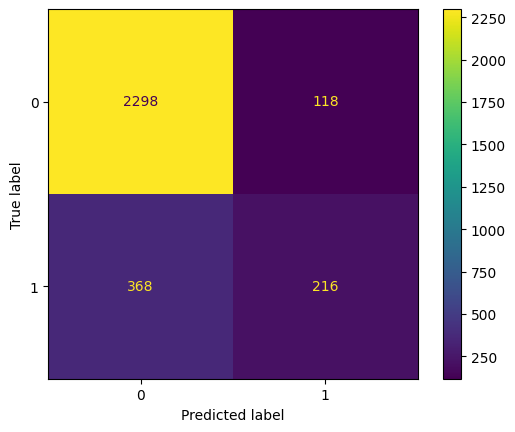

In [302]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))


Naive Bayes

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      2416
           1       0.71      0.25      0.37       584

    accuracy                           0.83      3000
   macro avg       0.78      0.61      0.64      3000
weighted avg       0.82      0.83      0.80      3000



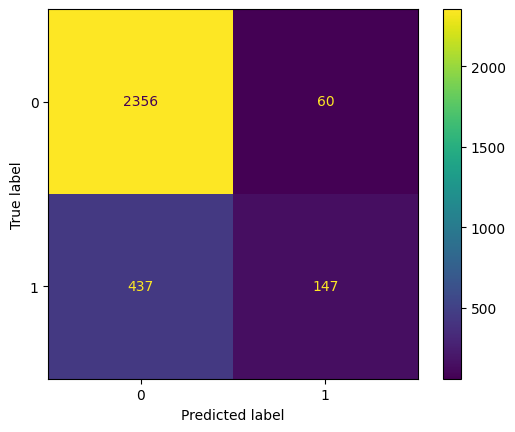

In [303]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

Support Vector Classifier

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2416
           1       0.83      0.37      0.51       584

    accuracy                           0.86      3000
   macro avg       0.85      0.68      0.72      3000
weighted avg       0.86      0.86      0.84      3000



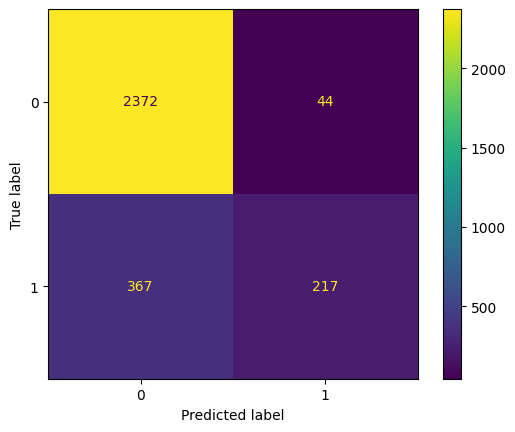

In [304]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)
y_pred=sv.predict(x_test)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      2416
           1       0.48      0.51      0.49       584

    accuracy                           0.80      3000
   macro avg       0.68      0.69      0.68      3000
weighted avg       0.80      0.80      0.80      3000



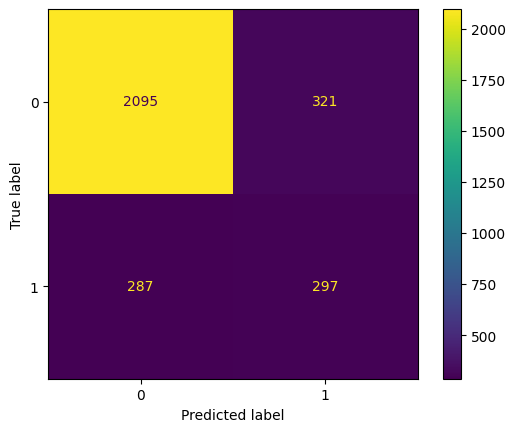

In [305]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

Random Forest Classifier

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.75      0.45      0.57       584

    accuracy                           0.86      3000
   macro avg       0.82      0.71      0.74      3000
weighted avg       0.85      0.86      0.85      3000



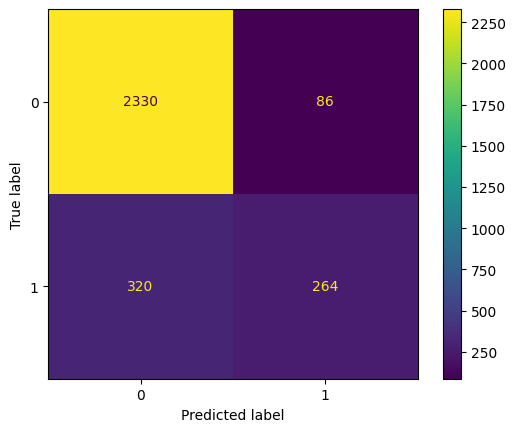

In [306]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

Adaboost Classifier

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      2416
           1       0.71      0.47      0.57       584

    accuracy                           0.86      3000
   macro avg       0.80      0.71      0.74      3000
weighted avg       0.85      0.86      0.85      3000



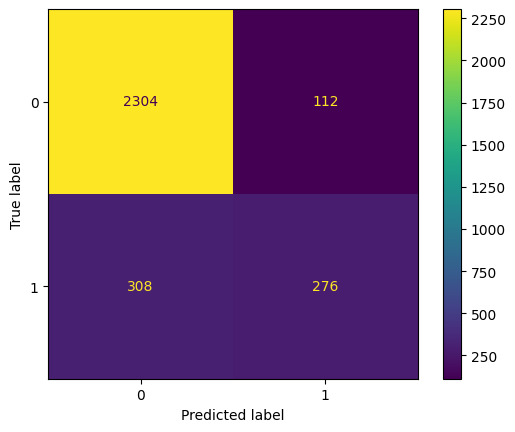

In [307]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
y_pred=ad.predict(x_test)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

Accuracy comparison

In [311]:
df=pd.DataFrame({'Model':['KNN','NAIVE BAYES','SVC','DECISION TREE','RANDOM FORREST','ADABOOST'],'Accuracy':[0.81,0.83,0.84,0.79,0.86,0.86]})
df['Accuracy']=df['Accuracy']*100
df

,Model,Accuracy
0,KNN,81.0
1,NAIVE BAYES,83.0
2,SVC,84.0
3,DECISION TREE,79.0
4,RANDOM FORREST,86.0
5,ADABOOST,86.0


# **Plotting Accuracy of models**

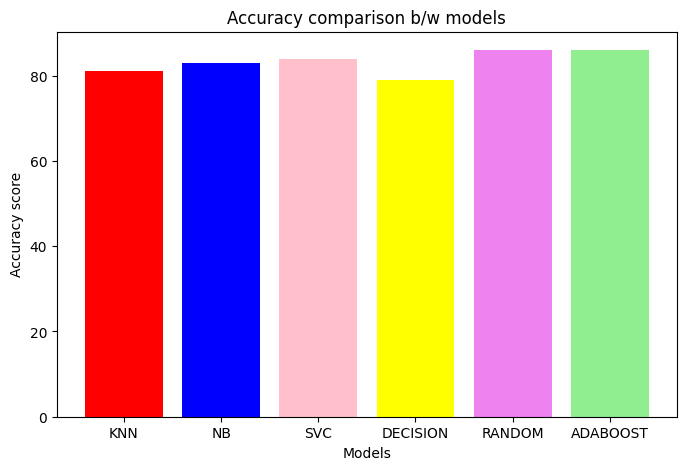

In [312]:
plt.figure(figsize=(8,5))
Models=['KNN','NB','SVC','DECISION','RANDOM','ADABOOST']
Accuracy=[81.0,83.0,84.0,79.0,86.0,86.0]
plt.title('Accuracy comparison b/w models')
plt.xlabel('Models')
plt.ylabel('Accuracy score')
plt.bar(Models,Accuracy,color=['red','blue','pink','yellow','violet','lightgreen'])
plt.show()


From the chart we can say that accuracy score of Support Vector Machine classifier is Higher

# **Predicting new values**

In [310]:
y_new=sv.predict(scaler.transform([[850,2,0,43,2,125510.82,1,1,1,79084.10]]))
if y_new==0:
  print('Continues to be a customer')
else:
  print('Left the bank')

Continues to be a customer
